# <b><center>A brief overview of seismic activity in the Kivu province, Albertine Rift Valley, from 1990 to 2022</center></b>

<center>Tumaini Sadiki Arsène</center>
<center><i><u>Goma Volcano Observatory (GVO), DR Congo</u></i></center>

<b>Introduction</b>

<div style="text-align: justify"> The Albertine Rift is the western branch of the East African Rift, covering parts of Uganda, the Democratic Republic of the Congo (DRC), Rwanda, Burundi and Tanzania. It extends from the northern end of Lake Albert to the southern end of Lake Tanganyika. The geographical term includes the valley and the surrounding mountains. The Albertine Rift and the mountains are the result of tectonic movements that are gradually splitting the Somali Plate away from the rest of the African continent. The mountains surrounding the rift are composed of uplifted Pre-Cambrian basement rocks, overlaid in parts by recent volcanic rocks. The northern part of the rift is crossed by two large mountain ranges, the Rwenzori Mountains between Lake Albert and Lake Rutanzige (formerly Lake Edward) and the Virunga Mountains between Lake Rutanzige and Lake Kivu. The Virungas form a barrier between the Nile Basin to the North and East and the Congo Basin to the West and South. South of the Virunga, Lake Kivu drains to the south into Lake Tanganyika through the Ruzizi River. Lake Tanganyika then drains into the Congo River via the Lukuga River. It seems likely that the present hydrological system was established quite recently when the Virunga volcanoes erupted and blocked the northward flow of water from Lake Kivu into Lake Edward, causing it instead to discharge southward into Lake Tanganyika. The Kivu province is located at the junction between the well-defined Ruzizi basin to the South and the Lake Albert trough to the North. This area includes the most prominent geological and geophysical features of the Western Rift Valley of Africa, e.g., the Kivu and Ruzizi basins, the Virunga volcanics, the lake Edouard trough, the Ruwenzori horst and Lake Albert trough. It is characterized by the highest uplift and by complex dislocation of the crust, accompanied by the most intensive volcanism in the Western Rift valley of Africa.</div>

<div style="text-align: justify"> This work aims to briefly analyze the seismicity of the Albertine Rift in the western part of the East African Rift over the last 32 years from the spatio-temporal distribution of events. Then, we will try to download and analyze the seismogram of the event of May 25, 2021 at 09:03:00 ( Mb=4.7), the first event recorded  after the eruption of the Nyiragongo volcano on May 22, 2021  in the region with magnitude higher than 4.5.</div>

<b>Data processing</b>

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import geopandas as gpd
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy.clients.fdsn import Client
from mpl_toolkits.basemap import Basemap
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import trigger_onset
from obspy.signal.trigger import recursive_sta_lta

To find the events in the region, we need to set the setting parameters for our region of interest and the code below shows the setting parameters used.

In [2]:
#Setting parameters

client = Client("IRIS")
startt = UTCDateTime("1990-01-01T00:01:00")
endt = UTCDateTime("2022-08-31T00:01:00")
min_lat =-6.0
max_lat = 6.0
min_lon = 25.0
max_lon = 32.0

All events used in this study can be find at the link:
<div style="text-align: justify">http://service.iris.edu/fdsnws/event/1/query?starttime=1990-01-01T00:01:00&endtime=2022-08-31T00:01:00&includeallmagnitudes=true&orderby=time&format=geocsv&mindepth=0&maxdepth=500&maxlat=6&minlon=25&maxlon=32&minlat=-6&nodata=404</div>


Retrieve the catalog and print events

In [3]:
cat = client.get_events(starttime=startt, endtime=endt, minlatitude=min_lat, minlongitude=min_lon,
                        maxlatitude=max_lat, maxlongitude=max_lon)
print(cat)

1276 Event(s) in Catalog:
2022-08-11T03:28:20.215000Z |  +0.636,  +30.267 | 3.6  mb_Lg
2022-06-24T20:14:10.678000Z |  -2.723,  +28.680 | 4.4  mb
...
1990-05-23T12:26:47.430000Z |  +5.168,  +31.784 | 4.9  mb
1990-05-20T19:30:44.670000Z |  +5.153,  +31.967 | 4.5  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


<div style="text-align: justify"> Using the link above, we get a csv file delimited by "|" and containing all the event information. Using the latitude, longitude, depth and magnitude information and also using an etopo image (which shows the topographic features both on land and under the lakes) as a background map, we make the map below of our interested area  with the epicenters of all the seismic events in our catalog.
For this step, I used Basemap tool to visualize my data which is a great tool for creating maps using python in a simple way. You can read more about this Basemap tool on the link: https://basemaptutorial.readthedocs.io/en/latest/first_map.html</div>


First, I create a pandas.DataFrame from my obtained csv file and then extract different columns useful for event plotting. 

In [4]:
#Pandas.DataFrame

df=pd.read_csv("fdsnws-event_2022-09-05T10 15 06Z.txt", sep="|", header=None)

latitude= df[2]
longitude = df[3]
depth = df[4]
magnitude = df[10]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


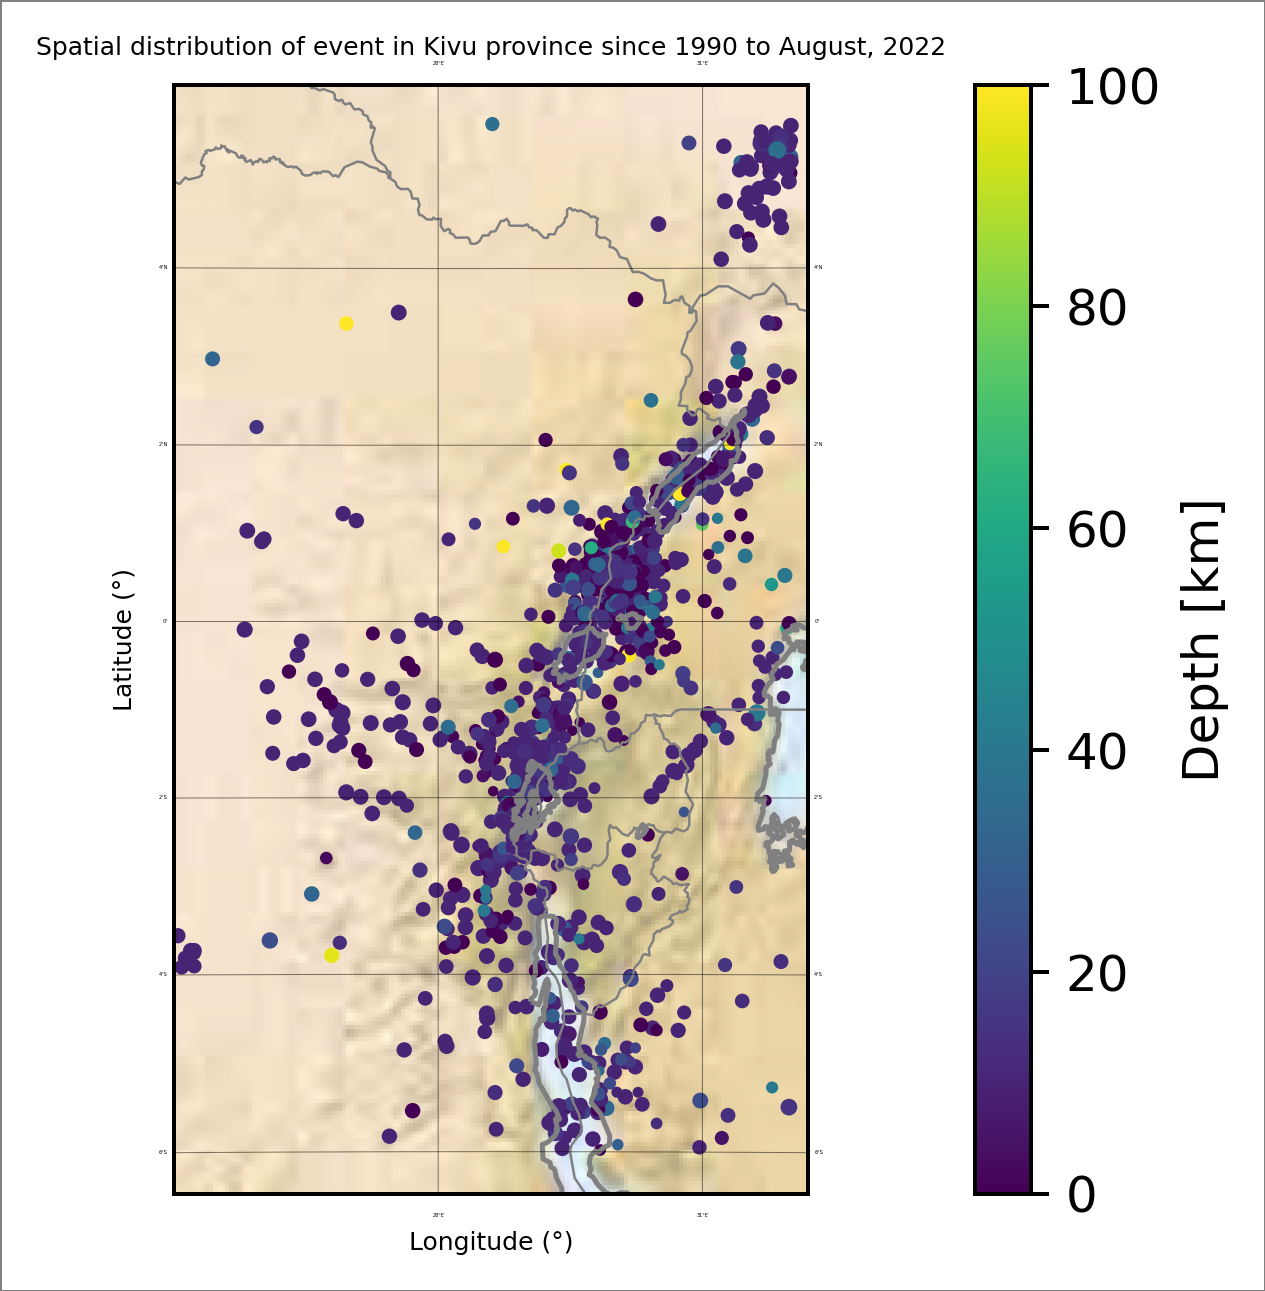

In [5]:
#This cell code shows the Kivu province map with all epicenters of events using the UTM projection, zone 35S.
fig = plt.figure(figsize=(12, 4), dpi=360, edgecolor='0.5',linewidth=0.5)
m = Basemap(projection='gnom', resolution='i',
            width=0.8E6, height=1.4E6, 
            lat_0=-0.2, lon_0=28.6)
m.etopo(scale=1.5, alpha=0.5)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
#Drawing meridians and parallels on my map
m.drawmeridians(np.arange(25,32,3),dashes=[0.01,0.01],linewidth=0.2,
                labels=[True,True,True,True],fontsize=0.1)
m.drawparallels(np.arange(-6,6,2),dashes=[0.01,0.01],linewidth=0.2,
                labels=[True,True,True,True],fontsize=0.1)

# scatter plot of seismic data, with color reflecting depth and size reflecting magnitude

m.scatter(longitude, latitude, latlon=True, 
          c=depth, s=magnitude,
          cmap='viridis', alpha=1)
# create colorbar and label the axies
plt.colorbar(label= 'Depth [km]')
plt.clim(0, 100)
plt.title("Spatial distribution of event in Kivu province since 1990 to August, 2022", fontsize=5)
plt.xlabel("Longitude (°)", fontsize=5)
plt.ylabel("Latitude (°)", fontsize=5)
plt.show()

<div style="text-align: justify"> This map shows the spatial distribution of the events in our catalog and it is clear that our events are well concentrated and distributed largely in the direction of the African Great Lakes rift with a strong concentration between lakes Eduard and Albert but also around Lake Kivu. The color indicates the depth at which the event was located, but the size refers to the magnitudes of the event in the catalog.</div>

<div style="text-align: justify"> In the next step, we propose to create a map with all events plotted on top using a spherical Mercator projection from GeoPandas which is an open source project to add geographic 
data support to panda objects. All information about GeoPandas can be found at the following link: https://geopandas.org/en/stable/docs.html</div>


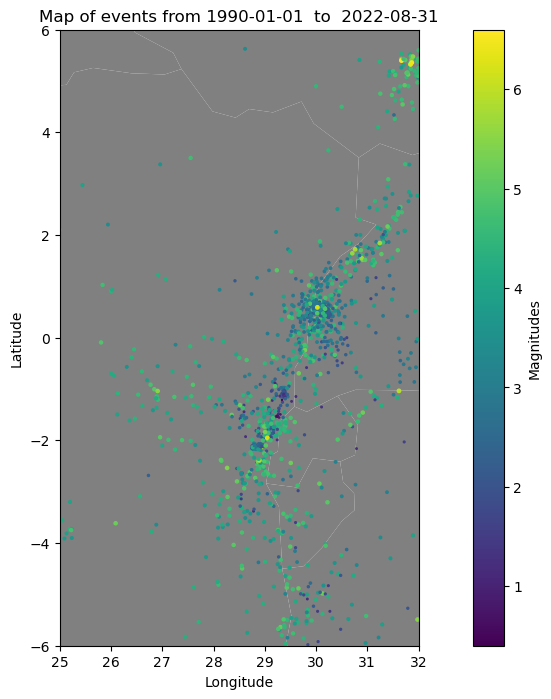

In [6]:
#Storing the Time, Magnitudes, Latitude and Longitude

times = []
mags = []
lat = []
lon = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
    lat.append(event.origins[0].latitude)
    lon.append(event.origins[0].longitude)
#convert times to a matplotlib number format
mtimes = mdates.date2num(times)
#create a worldmap using a spherical Mercator projection from GeoPandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(14,8))
worldmap.plot(color="gray", ax=ax)

# Plotting our Impact Energy data with a color map

plt.scatter(lon, lat, c=mags, s= mags, alpha=1, cmap='viridis')
plt.colorbar(label='Magnitudes')
# Creating axis limits and title
plt.xlim([25, 32])
plt.ylim([-6, 6])
plt.title("Map of events from" + " " + str(startt.year) + "-" + "0" + str(startt.month) + "-" + "0"
          + str(startt.day) + "  " + "to" + "  " + str(endt.year) + "-" + "0" + str(endt.month) + 
          "-" + str(endt.day))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<div style="text-align: justify"> This figure also shows in addition to the spatial distribution of the events in our catalog, the distribution of energy of these events through their magnitudes. We see that most of these events have a magnitude range between 2.5 and 5.5. Although the energy is spread over the whole region, we can still see that the activity occurs along the rift, between lakes Eduard and Tanganyika and it is in this same part of our area that we find more events with low energy (magnitude less than 3). It is also worth noting that the largest magnitude recorded so far in this region remains that of 2002, with a value of Mw = 6.2. (see earthquake of October 24, 2022 at 06:08:38).</div>

The next code cells  are going to show the depth distribution of our seismic events over time and magnitude using 1D and 3D.

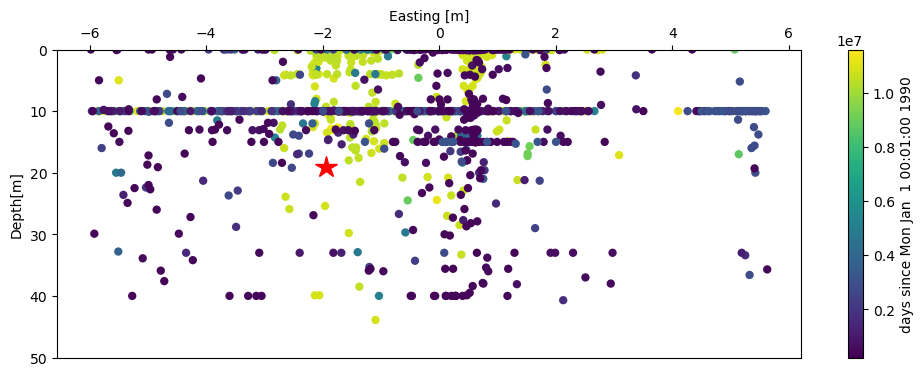

In [7]:
#Looking at Depth over Time

fig = plt.figure(figsize=(12,4))
plt.scatter(df[2],df[4],c=df[0], alpha=1, edgecolors='none', cmap="viridis")
plt.plot(-1.951, 19.05, marker="*", color="red", markersize=16) #plot of event with Mw=6.2, the largest.
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position("top")
plt.xlabel('Easting [m]')
plt.ylabel('Depth[m]')
plt.ylim(50,0)
cbar = plt.colorbar()
cbar.set_label('days since {}'.format(startt.ctime()), rotation=90)
plt.show()

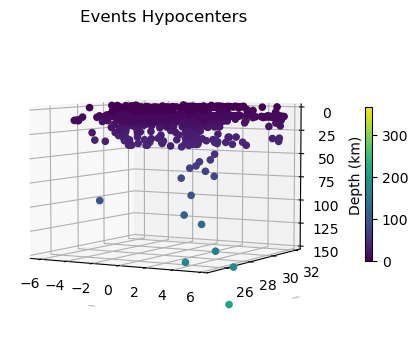

In [8]:
#The plot of the 3D graph showing the depth distribution.

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(projection='3d')
ax.invert_zaxis()
ax.set_xlabel('Latitude (°)', fontsize=0.1)
ax.set_ylabel('Longitude (°)', fontsize=0.1)
ax.set_zlabel('Depth (km)')
ax.set_zlim(150,0)
ax.set_title("Events Hypocenters")
p=ax.scatter(latitude, longitude, depth, c=depth, alpha=1 , cmap="viridis")
ax.view_init(5)
fig.colorbar(p, extend='neither', spacing='proportional', orientation='vertical', shrink=0.5, format="%.0f")
plt.show()

<div style="text-align: justify"> The two figures above show the distribution of the epicenters of the events in time and as a function of depth. All of our events are located at less than 40 km depth and a consistency of events seems to take shape around 10 km depth forming a horizontal line visible on our graph. The oldest events seem to be located between latitude 3S and 1.55N. The red star on our graph indicates the depth at which the 2002 earthquake was located (Mw=6.2), the largest in terms of magnitude so far recorded in our region.</div>

This next  code cell will allow us to create a histogram using the datetime information 
stored in the times  list. You can read more about the axes.hist() function here:
https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.axes.Axes.hist.html


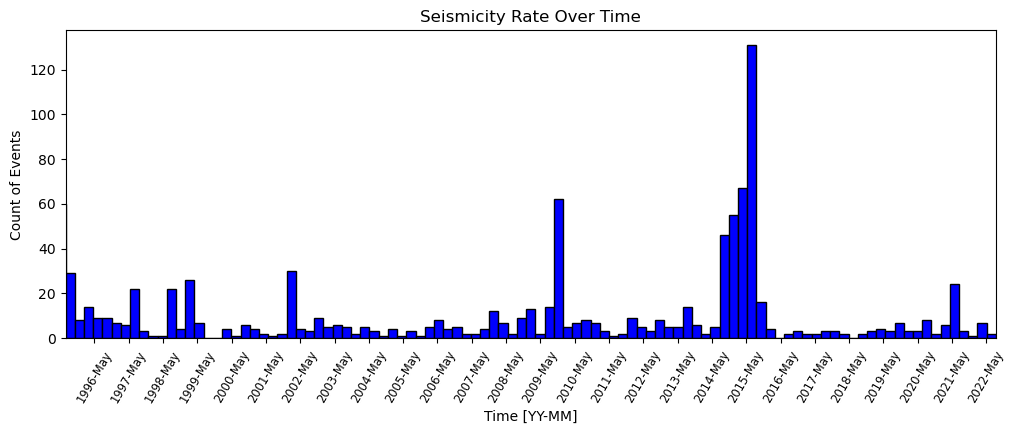

In [9]:
#Closer look at the number of events

fig2, axes = plt.subplots(figsize=(12, 4))
axes.hist(times, bins=120, color='blue', ec="k")
dtFmt = mdates.DateFormatter('%Y-%b')      # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) 
# show every 12th tick on x axes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.xticks(rotation=60, fontweight='normal',  fontsize='small',)
plt.title('Seismicity Rate Over Time')
plt.xlim(times[928], times[0])
plt.xlabel('Time [YY-MM]')
plt.ylabel('Count of Events')
plt.show()


Over the entire period of our study, we note that each month recorded less than 35 events except for the month of November 2009 and for the period from September 2014 to July 2015 where a number of 40 events per month was exceeded. The month in which we recorded a large number of events remains that of July 2015 (131 events).

We use the code cells below to see the behavior of the magnitudes as a function of depth and in time.

/tmp/ipykernel_28021/2851991759.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(times, mags, marker='.', color="orangered")


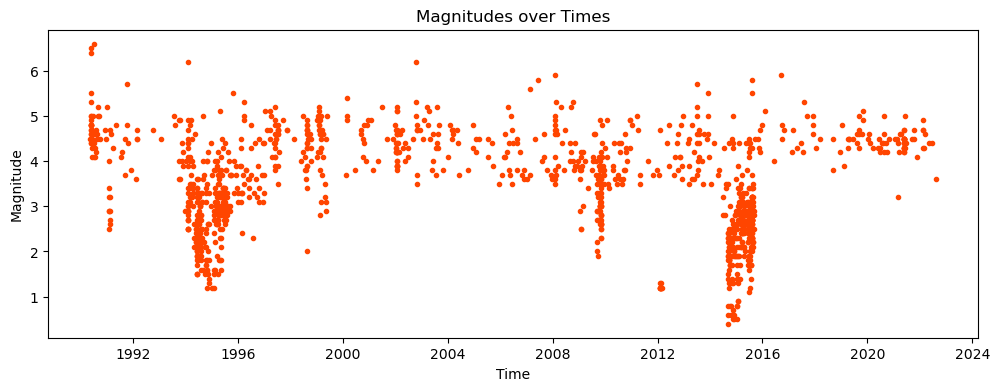

In [10]:
#Plot the magnitudes over time using a point symbol.

plt.figure(figsize=(12,4))
plt.plot_date(times, mags, marker='.', color="orangered")
plt.title('Magnitudes over Times')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()


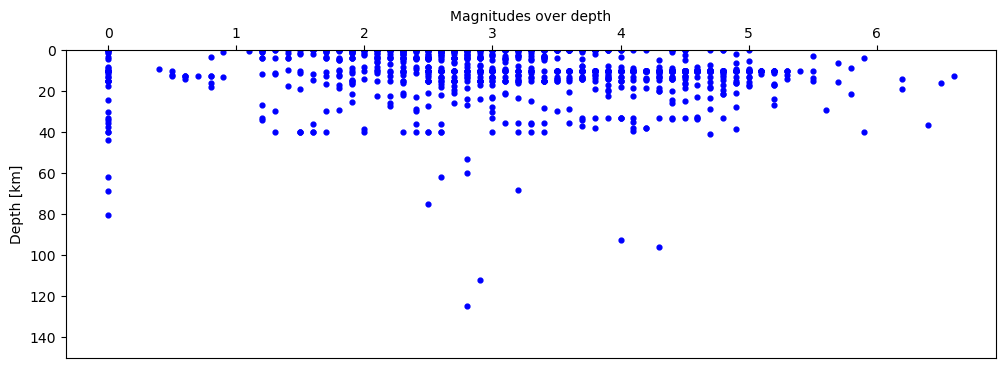

In [11]:
#Plot the Magnitude over Depth 

fig=plt.figure(figsize=(12, 4))
plt.scatter(magnitude, depth, s=12, marker="o", color="b", alpha=1)
plt.ylim(150,0)
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position("top")
plt.xlabel("Magnitudes over depth")
plt.ylabel("Depth [km]")
plt.show()

The values of magnitudes in our area are generally between 3 and 5.5 but it is observed that during the years 1993 to 1995 and 2014 to 2015 and a little less in 2009, the region has been much more active generally low magnitudes (Mw < 4)

 <b>Seismogram and spectrogram analysis</b>

<div style="text-align: justify">In this second part of our notebook, we propose to download and analyze the seismogram of the earthquake of May 25, 2021 at 9h03:00 felt by the local population (Goma and Gisenyi) and having caused numerous cracks in the two neighboring cities and whose magnitude estimated by the local network (KivuSnet) was about 5.2. We will use the "MBAR" station to access to the seismogram from the IRIS consortium.</div>

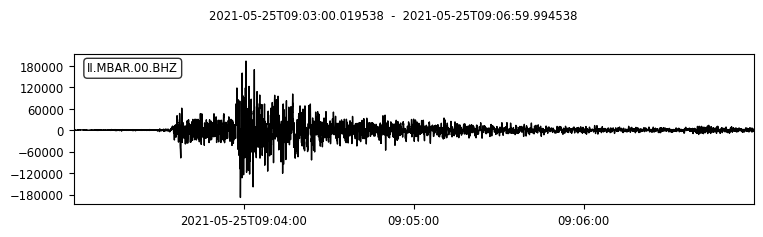

In [12]:
# Setting search parameters and plotting seismograms

client = Client("IRIS")
network = "II"
station = "MBAR"
location = "00"
channel = "BHZ"

starttime=UTCDateTime(2021,5,25,9,3,0)
endtime=starttime+240

#Stream
st = client.get_waveforms(network, station, location, channel, starttime, endtime)

# Plotting trace

tr = st[0]
fig = tr.plot()

The next code cell will allow you to plot a spectrogram for this earthquake. First, I am going to change the figsize parameter for matplotlib and then I plot the spectrogram.


In [13]:
plt.rcParams['figure.figsize'] = (12, 4) #figsize parameter

fig = tr.spectrogram(per_lap=.5, wlen=2)

<Figure size 1200x400 with 0 Axes>

For this event, I chosen 50% overlap of the sliding window and a window length of 2 seconds for this seismogram. 
I prefer also to change the range of amplitudes shown in the spectrogram. So, we can adjust the matplotlib figure with a few commands bellow.

(0.00019954241336160618, 70572.7278377941)


(0.0, 15.0)

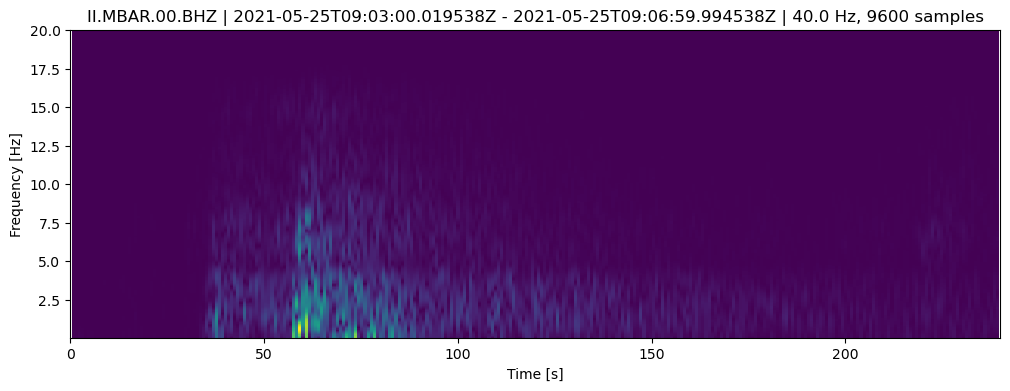

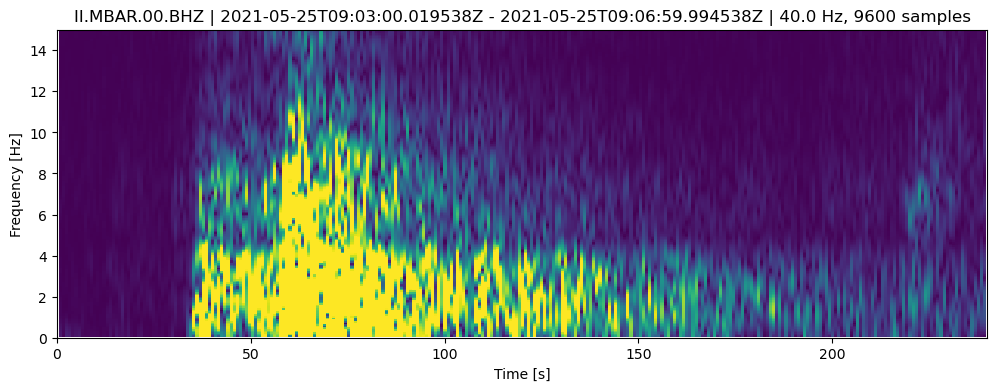

In [14]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=2)
ax = fig.axes[0]
im = ax.images[0]
print(im.get_clim())

#Focusing on the lower 10% of the amplitude variations
fig = tr.spectrogram(show=False, per_lap=.5, wlen=2)
ax = fig.axes[0]
im = ax.images[0]
im.set_clim(vmax=7000)
plt.ylim(0,15)  # Y axis limit

The spectrogram for this event shows an energy on frequencies up to 15 Hz and which decreases gradually with time.

In the following code cells, and to finally finish our little analysis of this seismogram, we will calculate the arrival time of the P wave at our station.

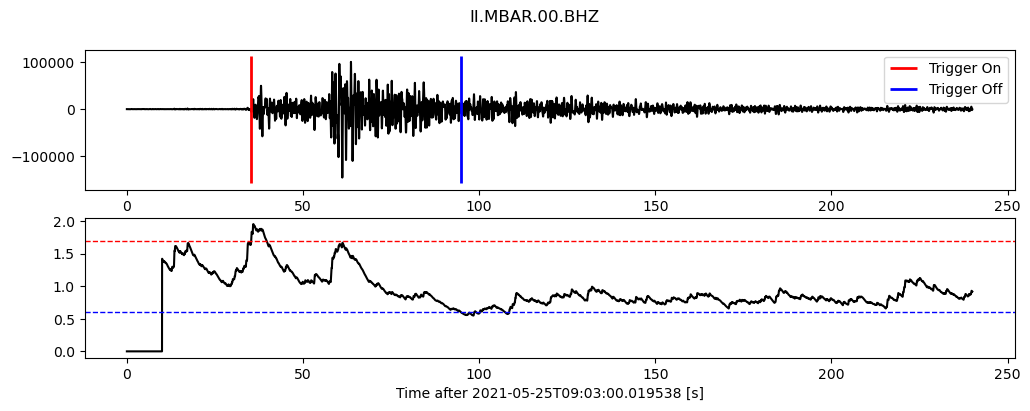

Calculated P wave:
2021-05-25T09:03:10.019538Z


In [15]:
#filtering
st.filter('bandpass', freqmin = 0.5, freqmax=3)
tr=st[0]
#auto-picking
samprate = tr.stats.sampling_rate
cf = recursive_sta_lta(tr, int(5*samprate), int(10*samprate))
fig = plot_trigger(tr, cf, 1.7, 0.6)
trig = trigger_onset(cf, 1.2, 0.5)/samprate
arrival = trig[0][0]
pick = tr.stats.starttime + arrival
print("Calculated P wave:")
print(pick)

The estimated P wave arrival for this event at MBAR  station was at May 25, 2021 at 09:03:10.019538

## <b>Conclusion</b>

<div style="text-align: justify"> Through this notebook, we have tried to make a brief overview of the seismic activity of the Albertine Rift in the western part of the East African Rift over the last 32 years, a zone where the African Great Lakes are also located. Seismic activity in this area is generally shallow (less than 40 km) and the epicenters of the events (generally magnitudes less than 5.5) are perfectly aligned with the rift. 
In view of the presence of active volcanoes (Nyiragongo and Nyamulagira) and the danger they represent for the local population, the strengthening of seismic monitoring techniques in this part of the West African Rift remains very useful and of concern.</div>

<b>Acknowledgements</b>

We would like to express our sincere thanks and gratitude to the teachers, Dr. Mike Brudzinski, Shannon Fasola, Michael Hubenthal and Yuri Tamama for their courage, guidance and pedagogical direction during this Seismology Skill Building Workshop for Undergraduates IRIS 2022.

<b>References</b>

Mavonga, T. (2007). Some characteristics of aftershock sequences of major earthquakes from 1994 to 2002 in the Kivu province, Western Rift Valley of Africa. Tectonophysics, 439(1-4), 1-12.

https://en.wikipedia.org/wiki/Albertine_Rift 

<c><center>Mail: sadikiarsenetb@gmail.com</center></c>